### Bangalore House Price Prediction - Supervised Regression Problem

### Business Problem
The main goal of this project is to find the price of the Bangalorer house using their features.

In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# load Dataset
# Load csv file from google drive 
# Main Source: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data
path = "https://drive.google.com/uc?export=download&id=13mP8FeMX09L3utbPcCDp-U2fXnf53gwx"
df_raw = pd.read_csv(path)
df_raw.shape

(13320, 9)

In [4]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


Exploratory Data Analysis

In [6]:
# copy the raw data
df = df_raw.copy()

In [7]:
# get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
# We have only 3 neumerical features - bath, balcony and price
# 6 categorical features - area type, availability, size, society, and total_srft
# Target Feature =======>>>>>> price >>>>>>
# Price in lakh
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


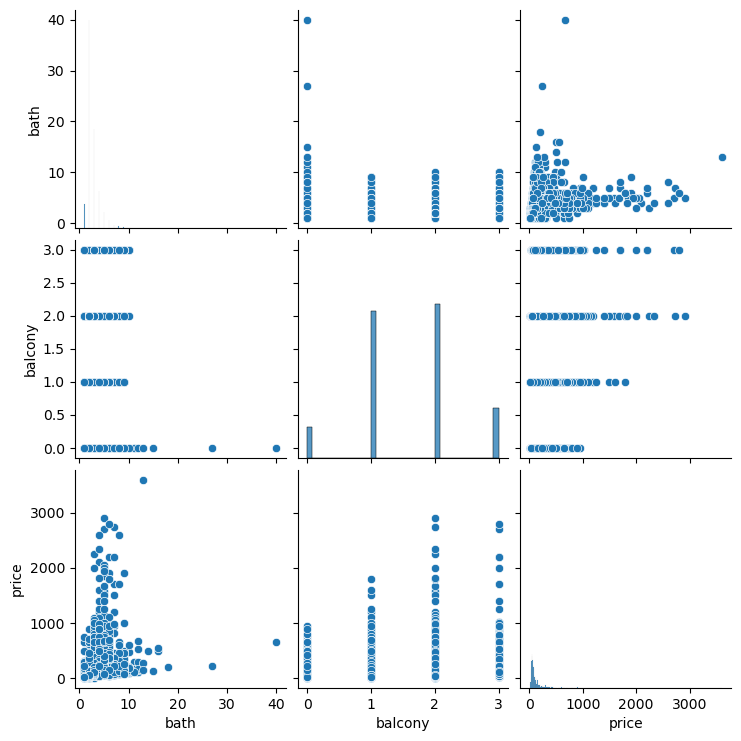

In [9]:
# observe 75% and max value it shows huge diff
# plot the pairplot
sns.pairplot(df)

In [10]:
# bath and price have slightly linear correlation with some outlier
# value count of each feature
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("--------------------------------")
value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-----------

<Axes: >

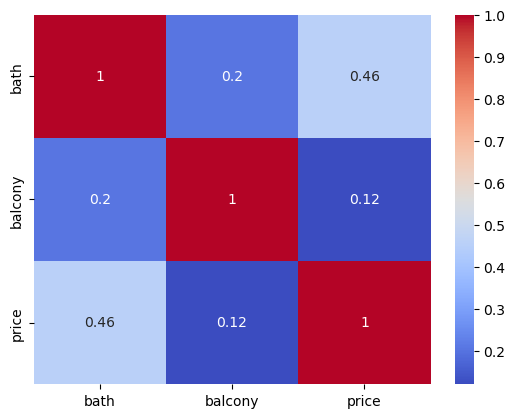

In [11]:
# correlation heatmap

nums_vars = ["bath", "balcony", "price"]
sns.heatmap(df[nums_vars].corr(), cmap="coolwarm", annot=True)

In [12]:
# observations
# correlation of bath is greater than a balcony with price

### Data Cleaning

In [13]:
df.isnull().sum() # find the missing values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
# % of missing values
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [15]:
# Observations
#society has 41.3% missing value (need to drop)

<Axes: >

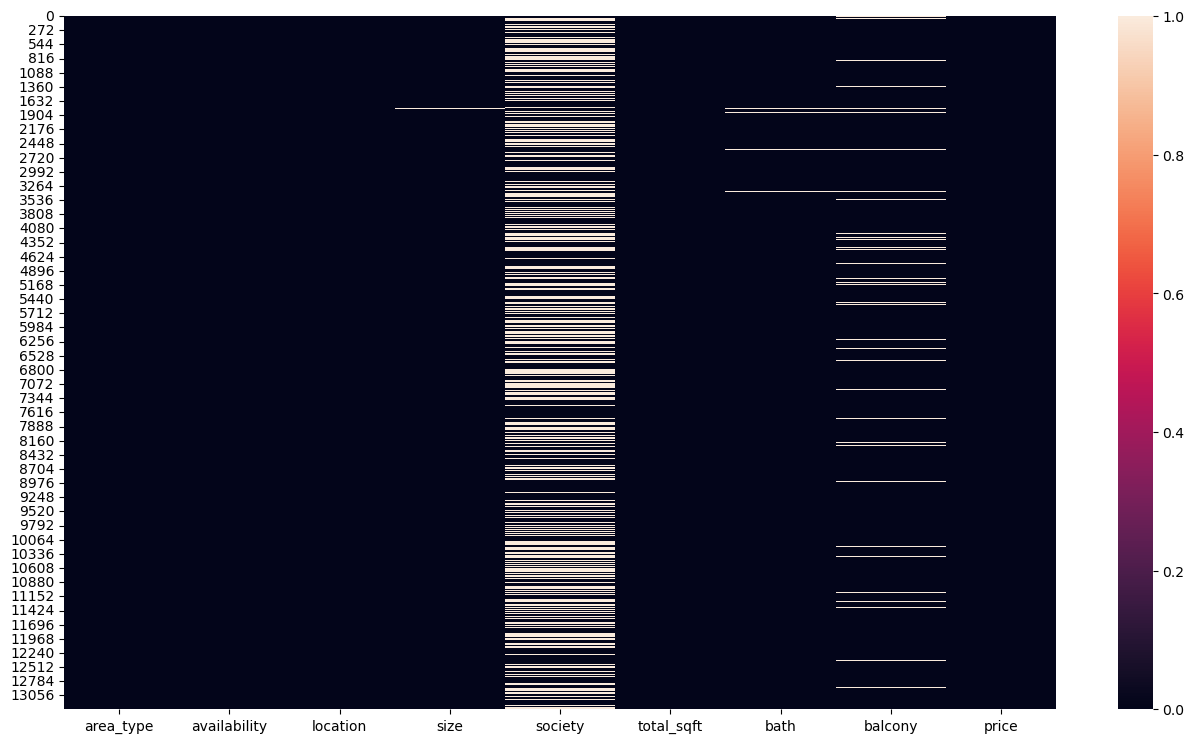

In [16]:
# visualize missing value using heatmap to get idea where is the value missing
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [17]:
# Drop ----------> society feature
# because 41.3% missing value
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

In [18]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [19]:
# drop the na or null value rows from df2
# because there is very less % value missing
df3 = df2.dropna()
df3.shape

(13246, 8)

In [20]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [21]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Feature Engineering

In [22]:
# To show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [23]:
# converting 'total_sqft' category feature into numeric
df3['total_sqft'].value_counts()

total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225          

Working on 'total_sqft' feature

In [24]:
# Observations
# here we observe that 'total_sqft' contain string value in diff format
#float, int like value 1689.28,817 
# range value: 540 - 740 
# number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds

In [25]:
# best strategy is to conver it into number by spliting it
total_sqft_int = []
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val)) # if '123.4' like value is there in str then convert into float
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0] + float[-1]) / 2)) # '123 - 456' this str value split and taken as mean
        except:
            total_sqft_int.append(np.nan) # if value does not contain any of the above format then consider it as nan

In [26]:
# reset the index of dataframe
df4 = df3.reset_index(drop=True) # drop=True - don't add index column in df

In [27]:
# join df4 and total_sqft_int list
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [28]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [29]:
df5.isnull().sum()

area_type           0
availability        0
location            0
size                0
total_sqft          0
bath                0
balcony             0
price               0
total_sqft_int    190
dtype: int64

In [30]:
# drop na values
df6 = df5.dropna()
df6.shape

(13056, 9)

In [31]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13056 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13056 non-null  object 
 1   availability    13056 non-null  object 
 2   location        13056 non-null  object 
 3   size            13056 non-null  object 
 4   total_sqft      13056 non-null  object 
 5   bath            13056 non-null  float64
 6   balcony         13056 non-null  float64
 7   price           13056 non-null  float64
 8   total_sqft_int  13056 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1020.0+ KB


Working on 'size' feature

In [32]:
# size feature shows the number of rooms
df6['size'].value_counts()

size
2 BHK         5148
3 BHK         4253
4 Bedroom      809
4 BHK          546
3 Bedroom      541
1 BHK          488
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           55
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [33]:
"""
In  size feature we assume that 
2 BHK = 2 Bedroom == 2 RK
so takes only number and remove suffix text
"""

size_int = []
for str_val in df6['size']:
    temp = []
    temp = str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("Noice = ", str_val)

df6 = df6.reset_index(drop=True)

In [34]:
# join df6 and the lisf of size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13056, 10)

In [35]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13051,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13052,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13053,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13054,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13055,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


### Finding the Outliners and Removing

******* bath *******


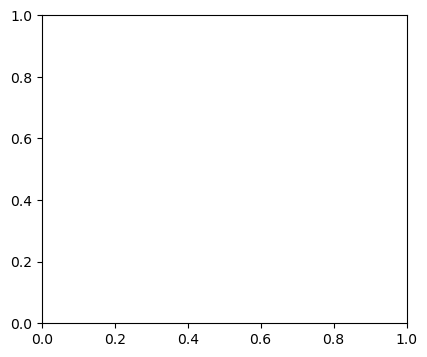

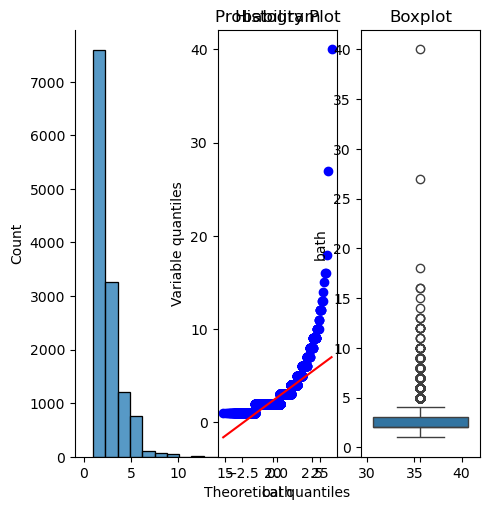

******* balcony *******


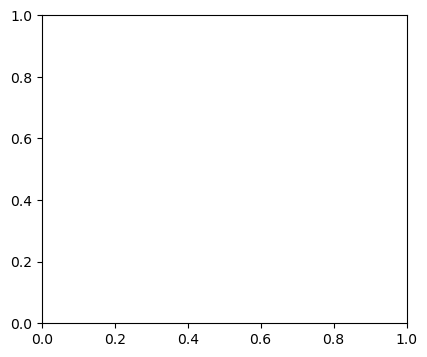

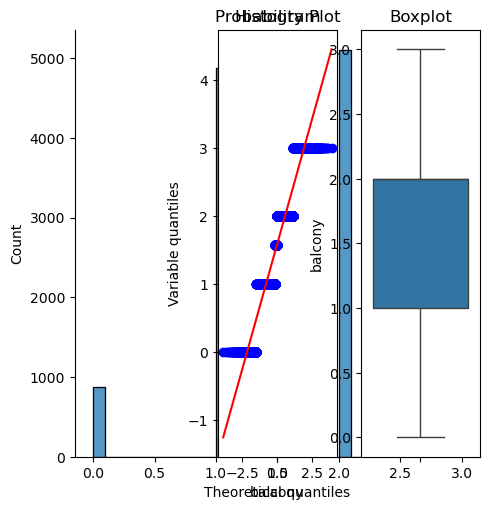

******* total_sqft_int *******


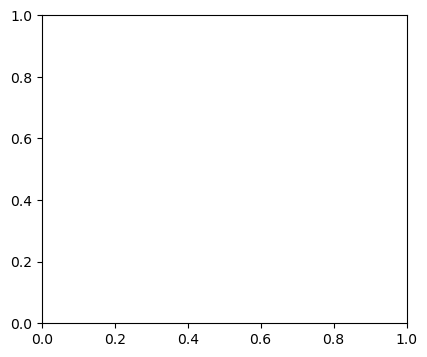

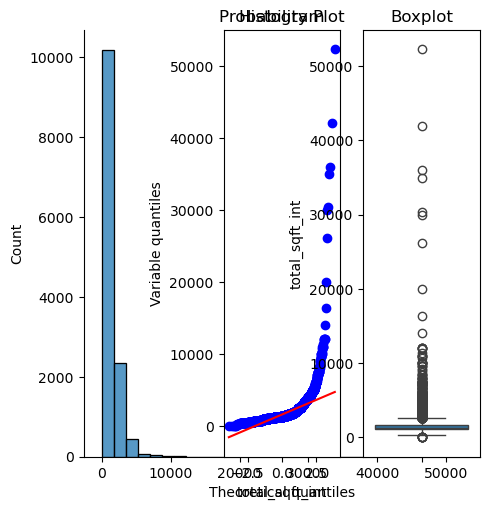

******* bhk *******


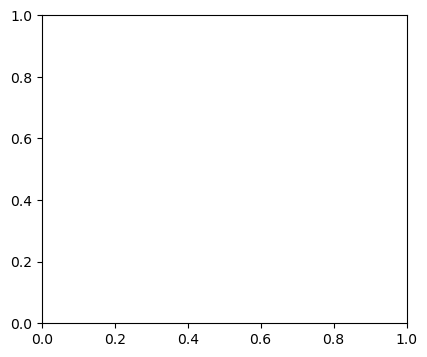

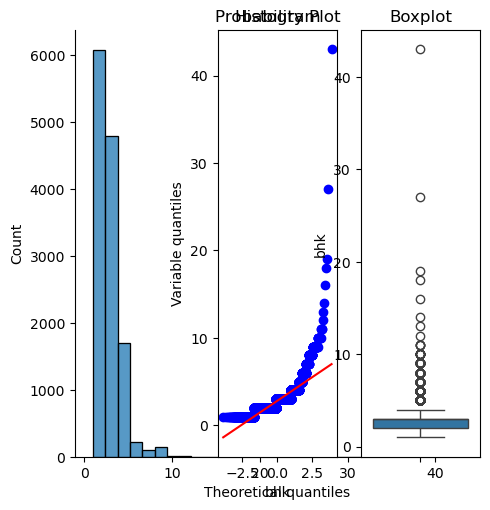

******* price *******


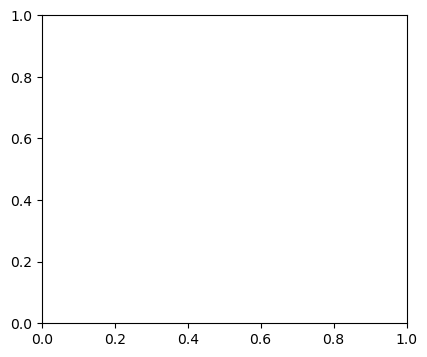

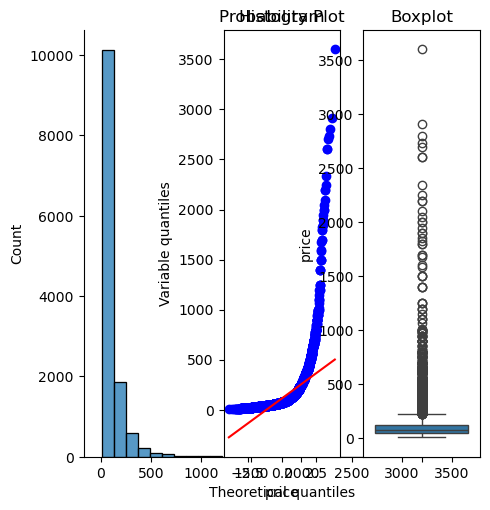

In [36]:
# function to create histogram, Q-Q plot and boxplot
# for Q-Q plot
import scipy.stats as stats 

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and the variable of interest as arguments
    
    #define figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1,3,1)
    sns.displot(df[variable], bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    
    # boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()
    
num_var = ["bath", "balcony", "total_sqft_int", "bhk", "price"]
for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(df7,var)
# here we observe outlier using histogram,, qq plot and boxplot

In [37]:
# here we consider  1 BHK requierd min 350 sqft are
df7[df7['total_sqft_int'] / df7['bhk'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
44,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
56,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [38]:
# no we found outliers
# if 1 BHK total_sqft are < 350 then we are going to remove them
df8  = df7[~(df7['total_sqft_int'] / df7['bhk'] < 350)]
df8.shape

(11963, 10)

In [39]:
# create new feature with price per square feet
# this helps to find the outliers
# price in lakh are there, so convert it into rupee and then / by total_sqft_int
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']
df8.head()

C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_21664\1995359150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [40]:
df8.price_per_sqft.describe()

count     11963.000000
mean       6198.311830
std        4038.820774
min         267.829813
25%        4200.000000
50%        5271.317829
75%        6818.181818
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
# Observations
# here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235

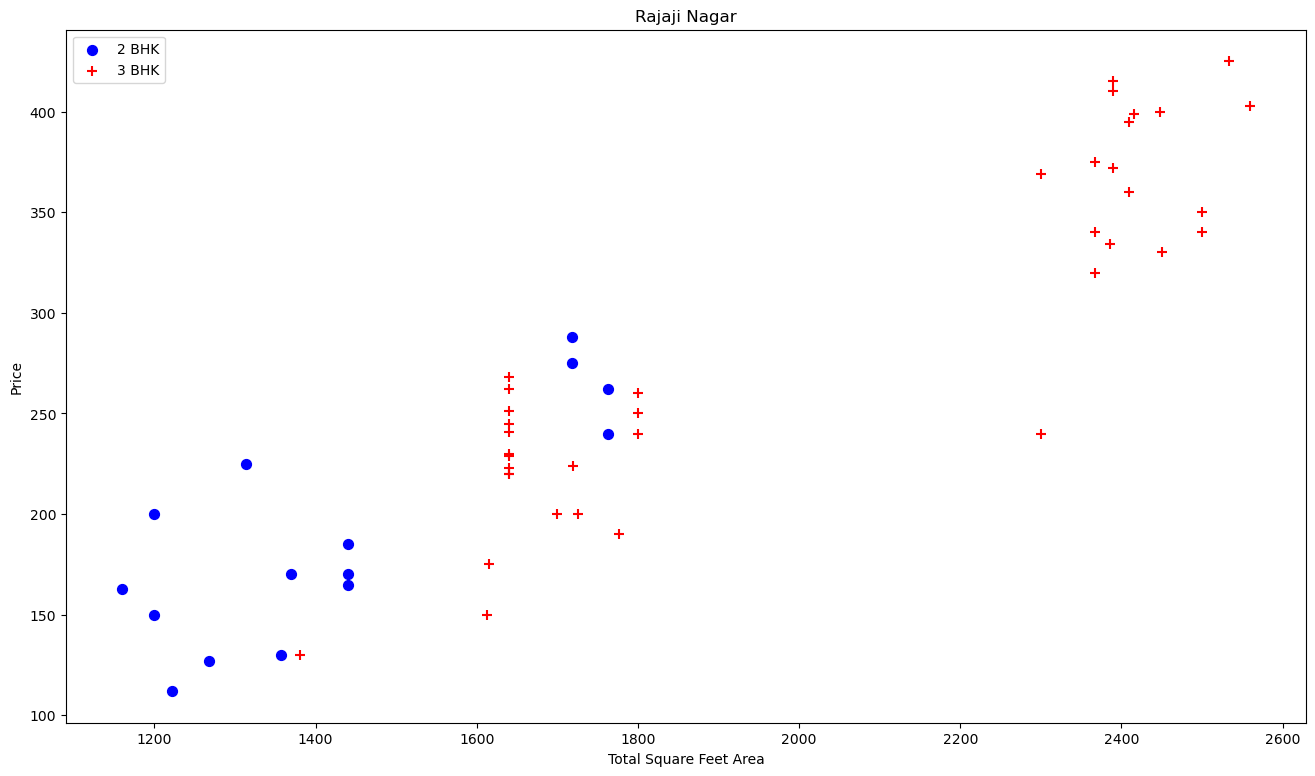

In [42]:
# Removing outliers using the help of 'price_per_sqft' taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df9 = remove_pps_outliers(df8)
df9.shape
 
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
 
plot_scatter_chart(df9, "Rajaji Nagar")

In [43]:
# Observations
# in above scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

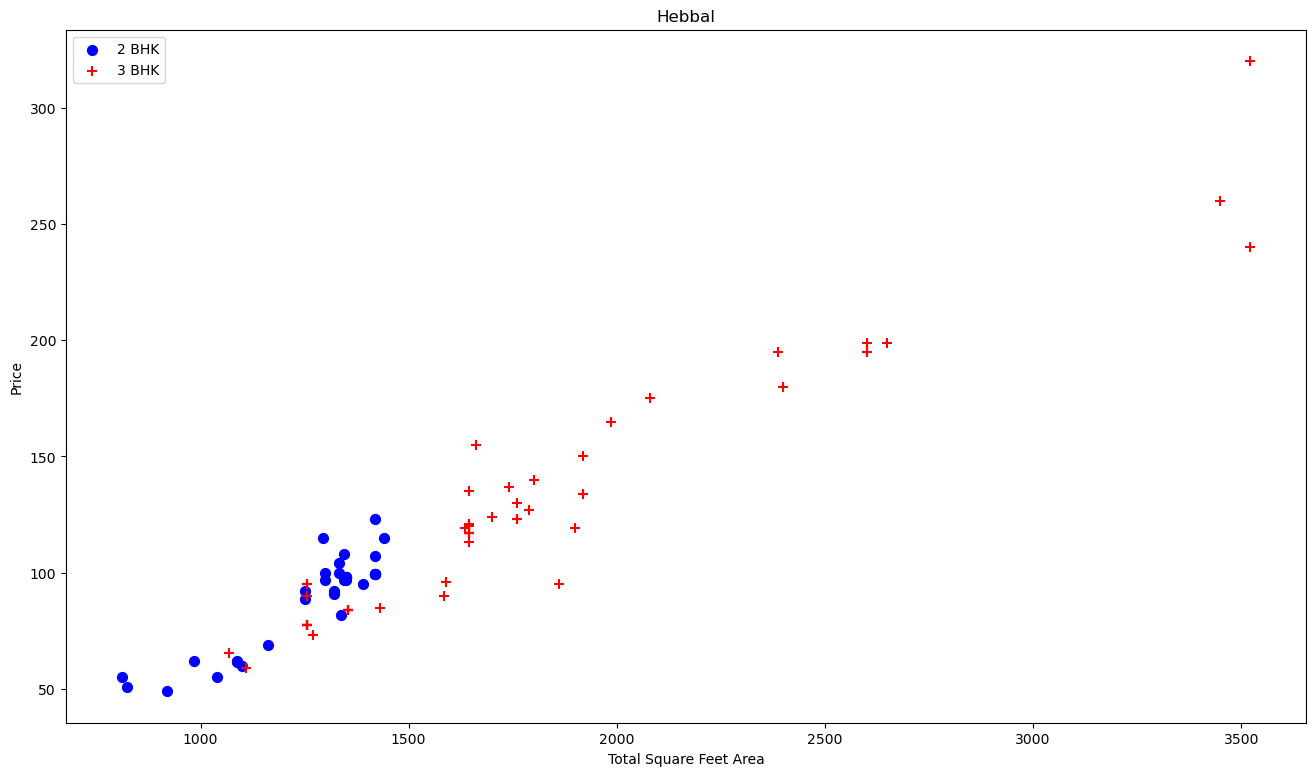

In [44]:
plot_scatter_chart(df9, "Hebbal")

In [45]:
# Observations
# in above scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

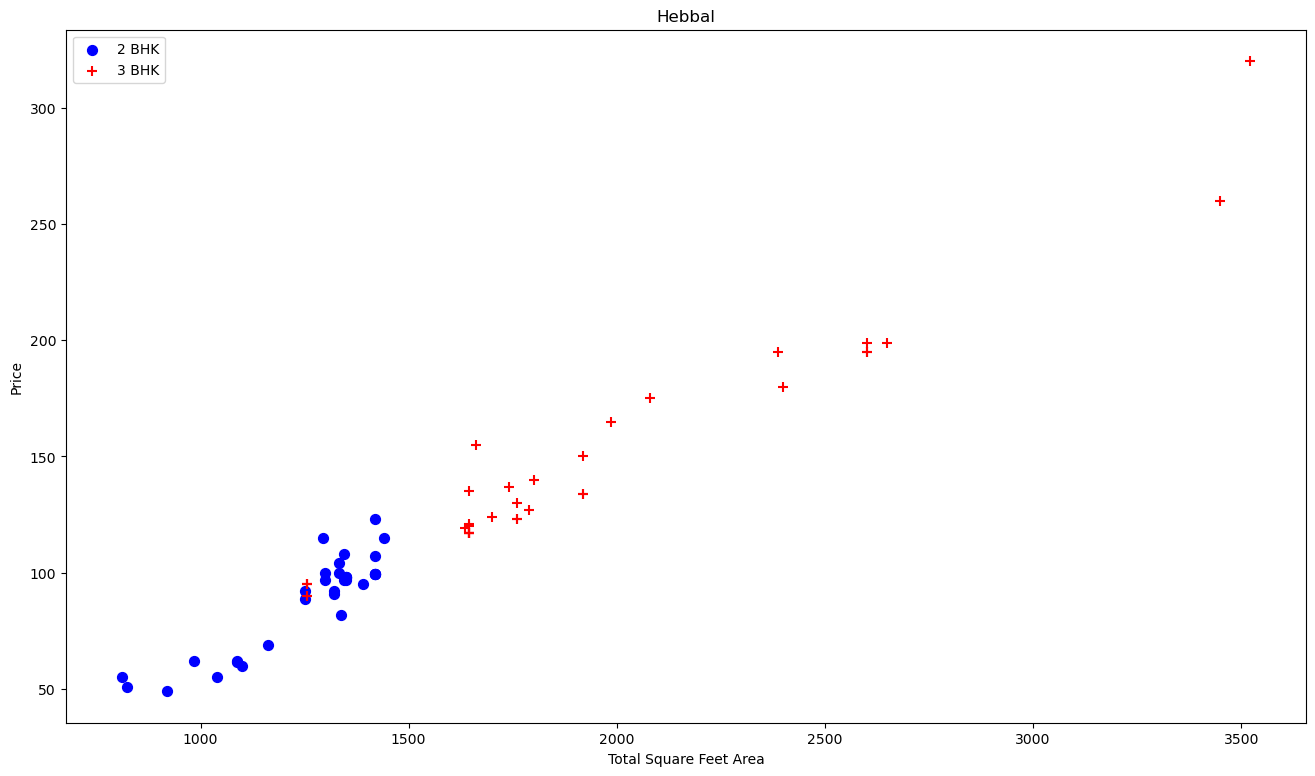

In [46]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 
df10 = remove_bhk_outliers(df9)
df10.shape

plot_scatter_chart(df10, "Hebbal")

In [47]:
# Observations
# In above scatter plot most of the red data point remove fron blue points

In [48]:
# Remove outliers using the help of 'bath' feature
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [49]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1839,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5779,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7027,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7494,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [50]:
# here we are considering data having only total no of bathrooms = bhk + 1
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

(7020, 11)

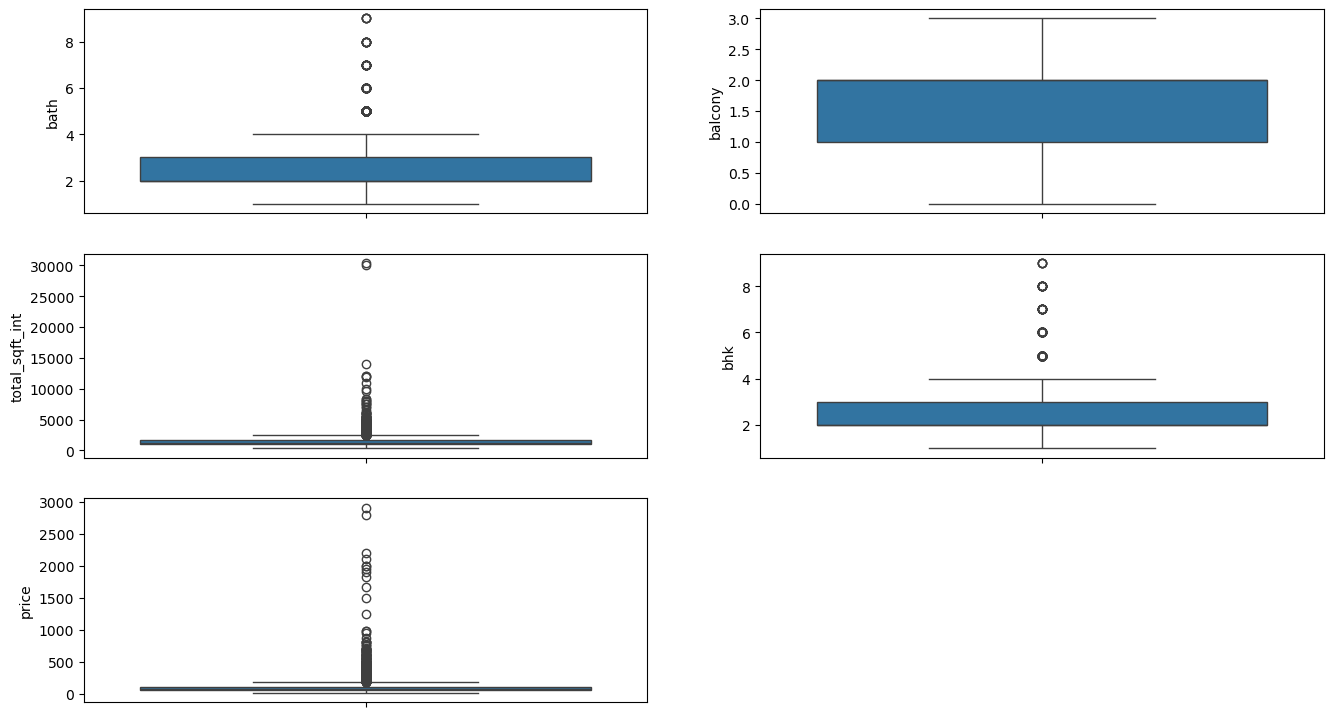

In [51]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df11[var])

In [52]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [53]:
df12 = df11.drop(['area_type', 'availability', 'location', 'size', 'total_sqft'], axis=1)
df12.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [54]:
df12.to_csv("clean_data.csv", index=False) # test ml model on this data
# ML model traied on this data and got best score >>>> XGBoost=0.914710

### Categorical Variable Encoding

In [55]:
df13 = df11.drop(["size","total_sqft"], axis=1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [56]:
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type', 'availability', 'location'])
df14.shape

(7020, 816)

In [57]:
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Bagalur Ma

In [58]:
df14.to_csv("oh_encoded_data.csv", index=False) # test ml model on this data

In [59]:
"""In ['area_type','availability','location'] contain multiple classe and if we convert them into OHE(One Hot Encoding) so it increase the size of DF 
so try to use those classes which are *frequently* present in the car var """

"In ['area_type','availability','location'] contain multiple classe and if we convert them into OHE(One Hot Encoding) so it increase the size of DF \nso try to use those classes which are *frequently* present in the car var "

Working on area_type feature 

In [60]:
df13['area_type'].value_counts()

area_type
Super built-up  Area    5250
Built-up  Area          1296
Plot  Area               440
Carpet  Area              34
Name: count, dtype: int64

In [61]:
df15 = df13.copy()

In [62]:
# apply Ohe-Hot Encoding on area_type feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape

(7020, 12)

In [63]:
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0


Working with availability feature

In [64]:
df15["availability"].value_counts()

availability
Ready To Move    5616
18-Dec            153
18-Apr            153
18-May            148
18-Aug            116
19-Dec             89
18-Jul             76
18-Mar             68
21-Dec             51
19-Mar             49
18-Jun             48
20-Dec             46
18-Feb             35
18-Nov             25
19-Jun             23
18-Oct             22
19-Jan             19
18-Sep             16
20-Jan             16
18-Jan             15
21-Mar             13
17-Dec             13
17-Oct             13
21-Jun             13
19-Jul             11
19-Sep             11
19-Aug             11
17-Jul             10
17-Jun              9
19-Apr              9
21-Jan              9
19-Oct              7
20-Oct              6
17-May              6
17-Sep              6
21-Feb              5
21-Jul              5
20-Jun              5
20-Aug              5
17-Apr              4
19-May              4
22-Jan              4
21-Oct              4
20-Nov              4
17-Nov             

In [65]:
# in availability feature, 10525 house 'Ready to Move" and remaining will be redy on perticuler date
# so we create new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df15["availability_Ready To Move"] = np.where(df15["availability"] == "Ready To Move", 1,0)
df15.shape

(7020, 13)

In [66]:
df15.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
8782,Super built-up Area,Ready To Move,frazertown,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1
8783,Super built-up Area,18-Nov,manyata park,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0
8784,Plot Area,Ready To Move,tc.palya,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1
8785,Plot Area,18-Apr,tc.palya,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0
8786,Plot Area,18-Apr,tc.palya,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,1,0


Working on Location feature

In [67]:
location_value_count = df15['location'].value_counts()
location_value_count

location
Whitefield                             205
Sarjapur  Road                         183
Electronic City                        158
Raja Rajeshwari Nagar                  116
Marathahalli                           116
Haralur Road                           116
Hennur Road                            107
Uttarahalli                            106
Bannerghatta Road                      102
Thanisandra                             97
Electronic City Phase II                87
7th Phase JP Nagar                      86
Hebbal                                  85
Yelahanka                               82
Kanakpura Road                          77
KR Puram                                58
Sarjapur                                53
Kasavanhalli                            53
Bellandur                               53
Begur Road                              52
Rajaji Nagar                            52
Kothanur                                49
Banashankari                            49
El

In [68]:
location_gert_20 = location_value_count[location_value_count >= 20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City',
       'Raja Rajeshwari Nagar', 'Marathahalli', 'Haralur Road', 'Hennur Road',
       'Uttarahalli', 'Bannerghatta Road', 'Thanisandra',
       'Electronic City Phase II', '7th Phase JP Nagar', 'Hebbal', 'Yelahanka',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Kasavanhalli', 'Bellandur',
       'Begur Road', 'Rajaji Nagar', 'Kothanur', 'Banashankari',
       'Electronics City Phase 1', 'Hormavu', 'Harlur', 'Akshaya Nagar',
       'Varthur', 'Jakkur', 'Hennur', 'HSR Layout', 'Ramamurthy Nagar',
       'Chandapura', 'Kaggadasapura', 'Koramangala', 'Ramagondanahalli',
       'Kundalahalli', 'Hulimavu', 'Budigere', '8th Phase JP Nagar',
       'Malleshwaram', 'Hoodi', 'Hegde Nagar', 'Gottigere', 'Channasandra',
       'Hosa Road', 'Bisuvanahalli', 'JP Nagar', 'Vittasandra', 'Indira Nagar',
       'Yeshwanthpur', 'Sahakara Nagar', 'Vijayanagar', 'Brookefield',
       'Kengeri', 'Old Airport Road', 'Panathur', 'Bommasandra',
   

In [69]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df16 = df15.copy()
for cat_var in location_gert_20:
    df16['location_'+cat_var] = np.where(df16['location'] == cat_var,1,0)
df16.shape

C:\Users\Nishanijohnkrupakar\AppData\Local\Temp\ipykernel_21664\1658925753.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var] = np.where(df16['location'] == cat_var,1,0)


(7020, 110)

In [70]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Haralur Road,location_Hennur Road,location_Uttarahalli,location_Bannerghatta Road,location_Thanisandra,location_Electronic City Phase II,location_7th Phase JP Nagar,location_Hebbal,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Rajaji Nagar,location_Kothanur,location_Banashankari,location_Electronics City Phase 1,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Varthur,location_Jakkur,location_Hennur,location_HSR Layout,location_Ramamurthy Nagar,location_Chandapura,location_Kaggadasapura,location_Koramangala,location_Ramagondanahalli,location_Kundalahalli,location_Hulimavu,location_Budigere,location_8th Phase JP Nagar,location_Malleshwaram,location_Hoodi,location_Hegde Nagar,location_Gottigere,location_Channasandra,location_Hosa Road,location_Bisuvanahalli,location_JP Nagar,location_Vittasandra,location_Indira Nagar,location_Yeshwanthpur,location_Sahakara Nagar,location_Vijayanagar,location_Brookefield,location_Kengeri,location_Old Airport Road,location_Panathur,location_Bommasandra,location_Green Glen Layout,location_Kudlu Gate,location_Old Madras Road,location_Jigani,location_Thigalarapalya,location_Yelahanka New Town,location_Rachenahalli,location_Ambedkar Nagar,location_Dodda Nekkundi,location_Mysore Road,location_Kadugodi,location_Attibele,location_Frazer Town,location_Balagere,location_TC Palaya,location_Talaghattapura,location_Kanakapura,location_Nagarbhavi,location_5th Phase JP Nagar,location_Lakshminarayana Pura,location_Anekal,location_Ananth Nagar,location_Jalahalli,location_Devanahalli,location_CV Raman Nagar,location_Kudlu,location_Kalena Agrahara,location_Kengeri Satellite Town,location_Bhoganhalli,location_Doddathoguru,location_Subramanyapura,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Domlur
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Drop Categorical Variable

In [71]:
df17 = df16.drop(["area_type", "availability", "location"], axis=1)
df17.shape

(7020, 107)

In [72]:
df17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Haralur Road,location_Hennur Road,location_Uttarahalli,location_Bannerghatta Road,location_Thanisandra,location_Electronic City Phase II,location_7th Phase JP Nagar,location_Hebbal,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Rajaji Nagar,location_Kothanur,location_Banashankari,location_Electronics City Phase 1,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Varthur,location_Jakkur,location_Hennur,location_HSR Layout,location_Ramamurthy Nagar,location_Chandapura,location_Kaggadasapura,location_Koramangala,location_Ramagondanahalli,location_Kundalahalli,location_Hulimavu,location_Budigere,location_8th Phase JP Nagar,location_Malleshwaram,location_Hoodi,location_Hegde Nagar,location_Gottigere,location_Channasandra,location_Hosa Road,location_Bisuvanahalli,location_JP Nagar,location_Vittasandra,location_Indira Nagar,location_Yeshwanthpur,location_Sahakara Nagar,location_Vijayanagar,location_Brookefield,location_Kengeri,location_Old Airport Road,location_Panathur,location_Bommasandra,location_Green Glen Layout,location_Kudlu Gate,location_Old Madras Road,location_Jigani,location_Thigalarapalya,location_Yelahanka New Town,location_Rachenahalli,location_Ambedkar Nagar,location_Dodda Nekkundi,location_Mysore Road,location_Kadugodi,location_Attibele,location_Frazer Town,location_Balagere,location_TC Palaya,location_Talaghattapura,location_Kanakapura,location_Nagarbhavi,location_5th Phase JP Nagar,location_Lakshminarayana Pura,location_Anekal,location_Ananth Nagar,location_Jalahalli,location_Devanahalli,location_CV Raman Nagar,location_Kudlu,location_Kalena Agrahara,location_Kengeri Satellite Town,location_Bhoganhalli,location_Doddathoguru,location_Subramanyapura,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Domlur
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False)